In [6]:
import tensorflow as tf

In [7]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
#gpus =tf.config.experimental.list_physical_devices('GPU')//('CPU')
#gpus

In [4]:
#len(gpus)

In [8]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
#limiting the memory growth
#looping every potential gpu that we have got through the previous line of code
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
#the priv line tell the tensorflow don't use all the memory but keep it to a mimimum or whatever you absolutely need

In [6]:
tf.config.list_physical_devices('GPU')

[]

In [7]:
#[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
os.path.join('data','happy')

'data\\happy'

In [9]:
#Remove doddy images
import cv2
import imghdr
from matplotlib import pyplot as plt

In [10]:
data_dir = 'data' 

In [11]:
#for image_class in os.listdir(data_dir):
#     for image in os.listdir(os.path.join(data_dir, image_class)):
#             print(image)

In [12]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [13]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [14]:
#load data
import numpy as np
#from matplotlib import pyplot as plt

In [15]:
#batch size ;the number of images inside each epoches(32 by default)
#size image :the size that will resize image to(by default in tensorflow 256 *256)
tf.keras.utils.image_dataset_from_directory??

In [16]:
#if we want to change default value
#data = tf.keras.utils.image_dataset_from_directory('data', batch_size=8, size_image=(128,128))                                                                                    ))

In [16]:
#this is where we are going to load our data
data = tf.keras.utils.image_dataset_from_directory('data')

Found 287 files belonging to 2 classes.


In [17]:
#we convert data into numy iterrator because this data is preloaded into memory already and it is actually a generator
#so we want to wrap the data that we want and the easiest way is to convert it to numpy iterator
#we can get consective batches using .next method
data_iterator = data.as_numpy_iterator()

In [18]:
#get another batch from iterator
#batch comboses of 2 part :batch[0] our images,batch[1]our labels
batch = data_iterator.next()

In [21]:
#batch[0]

array([[[[2.55000000e+02, 1.68000000e+02, 9.00000000e+00],
         [2.55000000e+02, 1.68000000e+02, 9.00000000e+00],
         [2.55000000e+02, 1.68000000e+02, 9.00000000e+00],
         ...,
         [2.53000000e+02, 1.69000000e+02, 9.00000000e+00],
         [2.53000000e+02, 1.69000000e+02, 9.00000000e+00],
         [2.53914062e+02, 1.69914062e+02, 9.91406250e+00]],

        [[2.55000000e+02, 1.68000000e+02, 9.00000000e+00],
         [2.55000000e+02, 1.68000000e+02, 9.00000000e+00],
         [2.55000000e+02, 1.68000000e+02, 9.00000000e+00],
         ...,
         [2.53000000e+02, 1.69000000e+02, 9.00000000e+00],
         [2.53000000e+02, 1.69000000e+02, 9.00000000e+00],
         [2.53914062e+02, 1.69914062e+02, 9.91406250e+00]],

        [[2.55000000e+02, 1.68000000e+02, 9.00000000e+00],
         [2.55000000e+02, 1.68000000e+02, 9.00000000e+00],
         [2.55000000e+02, 1.68000000e+02, 9.00000000e+00],
         ...,
         [2.53000000e+02, 1.69000000e+02, 9.00000000e+00],
         [

In [19]:
#images represented as numpy array
#32 images of shape 256 by 256 by 3 channels
batch[0].shape

(32, 256, 256, 3)

In [20]:
#class 1 :sad
#class 0:happy
batch[1]

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

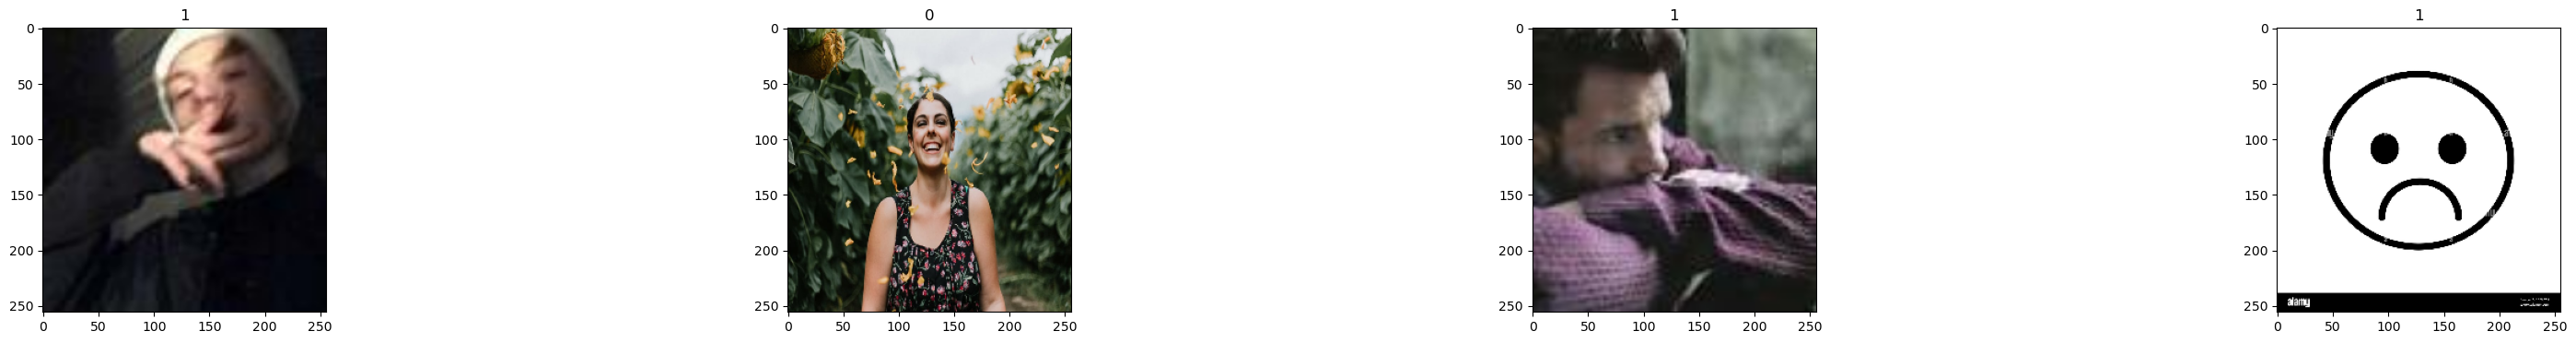

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(40,4))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
#Now when we are going to load an imagesof representation of a number of channels which are going to be (rgb)
#for openCv it is ging to be (bgr) but when use tenorflow it is going to be rgb but it is going to beof the values 0 to
#255

In [52]:
#our lowest value
#batch[0].min()

0.0

In [53]:
#255 before new work to make it 0
#IN Dl we want the scale value as small as possible to opimize a ton faster from(0 to 1)
#batch[0].max() = 255

1.0

In [54]:
#IN Dl we want the scale value as small as possible to opimize a ton faster from(0 to 1)
#this will give us value between 0 and 1 
#scaled=batch[0] / 255

In [55]:
#scaled.min()

0.0

In [56]:
#المفروض 1 
#scaled.max()

0.003921569

In [22]:
#34:00 minuite
#preprocessing
#scale data
#to do previous step in proffesional way
#because we don't want to do this each  time we  load batch so to do it  efficiently we are going to loading in the data through data piplines using the data pipline cabability
#we use map that allow us to apply particular transformation
# map allow you to do transformation in pipline
#when we going to pre-fetch data it's going to do that transformation
#this speed up how we can access to the data from our disk
#we use lambda functoion to go and do that transformation
#when we access our batch we 're going to get our imags and our labels
#it's going to be our Images X (it's going to be our independent features so we are going to passing them):Y label(target variable)
#Here  from data pipline we call function mab
#(x/255, y) as we load our batchwe are going to go and get our dat (x) and divide it by 255 that is our scaling  and ther is no transformation on y
#noe we effectively applied our transformation on data pipline
#Ther re alotof transformation you can do on tensorflow dataset pipline 
#you can search about them tf.data 
data = data.map(lambda x,y: (x/255, y))

In [23]:
#If we are not applying shuffling it is ging to return same value each time
scaled_iterator= data.as_numpy_iterator()

In [24]:
#to grab our first batch
batch= scaled_iterator.next()

In [71]:
#data.as_numpy_iterator().next()[0].min()

0.0

In [72]:
#data.as_numpy_iterator().next()[0].max()

1.0

In [67]:
#batch[0].max()

1.0

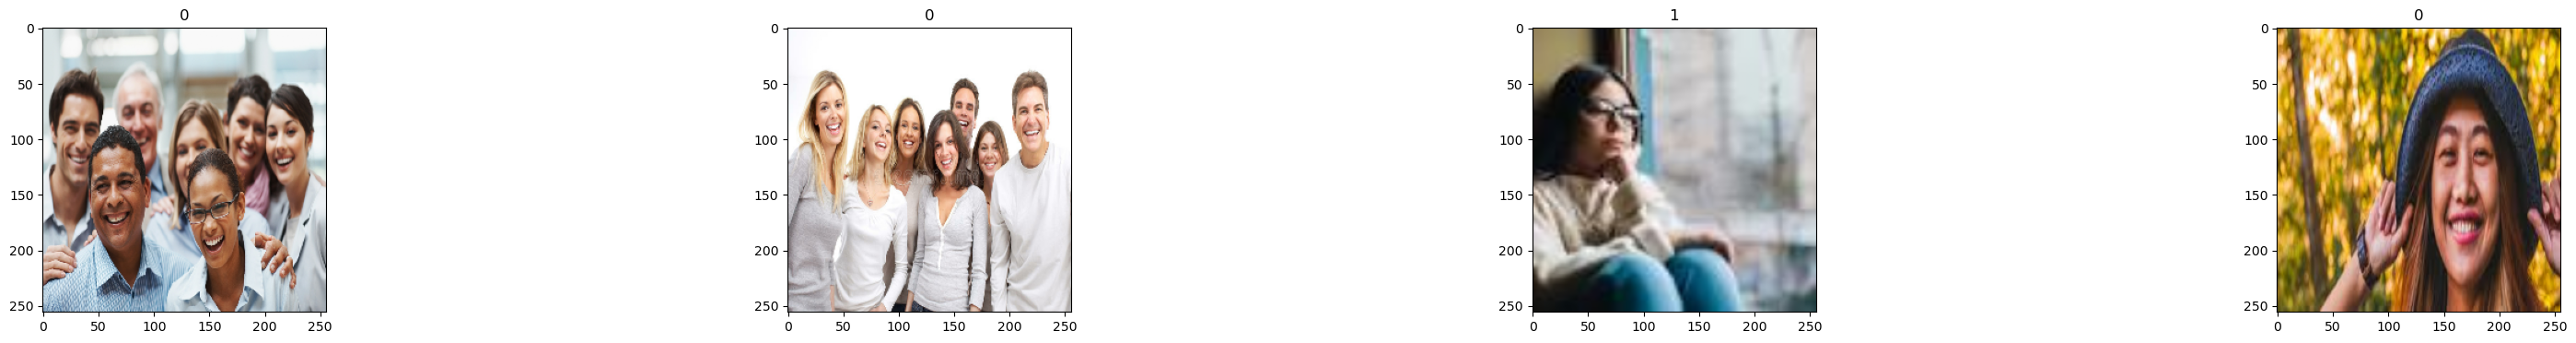

In [25]:
# we delete this because we chang the scale to 0 to 1: astype(int)
#without deleted just black images
#what happen that inside visuallization function we convert them in to integer but this paticular case 
#because they are betwwen 0 an 1 so the'd all be 0
#now they in a set of our scale data
fig, ax = plt.subplots(ncols=4, figsize=(40,4))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [98]:
#batch[0].max()

1.0

In [26]:
#So we have 9 batch every batch contain 32 images
len(data)

9

In [27]:
9*0.7
#our train batch

6.3

In [28]:
#split data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [29]:
train_size

6

In [30]:
val_size

2

In [31]:
test_size

1

In [32]:
train_size+test_size+val_size

9

In [33]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [34]:
#Build deep L model
#inside tensorflow and keras there are 2 model :sequintial it is great when we have 1 data input and 1 data outputand 
#(Quick and easy)
#the model sort of flows from top to the bottom and functional api when we have multiple input and output
#conv 2d:convoluti
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [35]:
model = Sequential()

In [36]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
#tf.optimizers.adam

In [38]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [33]:
#30*30*16

In [34]:
#MaxPooling2D?

In [40]:
logdir='logs'

In [41]:
#Callback is useful if you want to save your model as checkpoint,or if you want to do some speciefic logging
#finally we are specifiying the log directory equal to the logs folder above
#IF you want to come back and see how your training model perform ,did it vary at a particularpoint in time , do we need to drop our learning rate?..Inside of these boards we going to see that
#we can actually just plot them usinghistory that you collect from your training step
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [42]:
#Now after callback establish we are going to fit our model
#There are tow really important methods when it comes to building a neural  network (model.fit)(model.predict)
#so fit is the training component
#predict is when we actually go and make prediction
#remember her our trainig data was four batches of 32 images
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])
model.save('DeepCnn_saved_model/')

Epoch 1/20
6/6 [==============================] - 6s 660ms/step - loss: 1.6356 - accuracy: 0.5365 - val_loss: 0.7064 - val_accuracy: 0.5781
Epoch 2/20
6/6 [==============================] - 5s 541ms/step - loss: 0.7152 - accuracy: 0.4740 - val_loss: 0.6690 - val_accuracy: 0.5938
Epoch 3/20
6/6 [==============================] - 5s 562ms/step - loss: 0.6800 - accuracy: 0.5260 - val_loss: 0.7224 - val_accuracy: 0.4844
Epoch 4/20
6/6 [==============================] - 4s 548ms/step - loss: 0.6834 - accuracy: 0.5729 - val_loss: 0.6557 - val_accuracy: 0.5781
Epoch 5/20
6/6 [==============================] - 5s 640ms/step - loss: 0.6516 - accuracy: 0.5990 - val_loss: 0.6451 - val_accuracy: 0.5625
Epoch 6/20
6/6 [==============================] - 5s 662ms/step - loss: 0.5945 - accuracy: 0.7031 - val_loss: 0.5275 - val_accuracy: 0.7812
Epoch 7/20
6/6 [==============================] - 7s 767ms/step - loss: 0.5545 - accuracy: 0.6615 - val_loss: 0.4327 - val_accuracy: 0.8438
Epoch 8/20
6/6 [====

INFO:tensorflow:Assets written to: DeepCnn_saved_model/assets


INFO:tensorflow:Assets written to: DeepCnn_saved_model/assets


In [44]:
hist

In [39]:
hist.history

{'loss': [0.012901236303150654,
  0.008801150135695934,
  0.004015509504824877,
  0.004007844254374504,
  0.004041740205138922,
  0.002235331805422902,
  0.0008430695161223412,
  0.0009584291256032884,
  0.00102584483101964,
  0.0007348734070546925,
  0.0006732281181029975,
  0.0006044625770300627,
  0.0005448798183351755,
  0.0004082721716258675,
  0.0003725766728166491,
  0.0004105426778551191,
  0.00027749346918426454,
  0.00033143721520900726,
  0.00034842934110201895,
  0.0003022771852556616],
 'accuracy': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.00468285009264946,
  0.006837345659732819,
  0.013570889830589294,
  0.0021671298891305923,
  0.0029874967876821756,
  0.0010002914350479841,
  0.0015269978903234005,
  0.0007675345405004919,
  0.000914191419724375,
  0.0004691338981501758,
  0.0003805495798587799,
  0.0006563324714079499,
  0.0004921838408336043,
  0.0003184

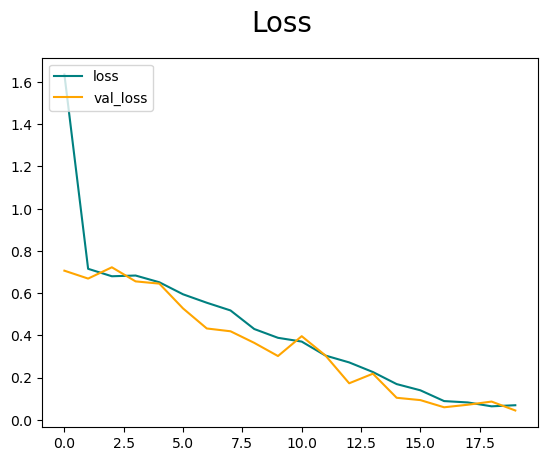

In [45]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

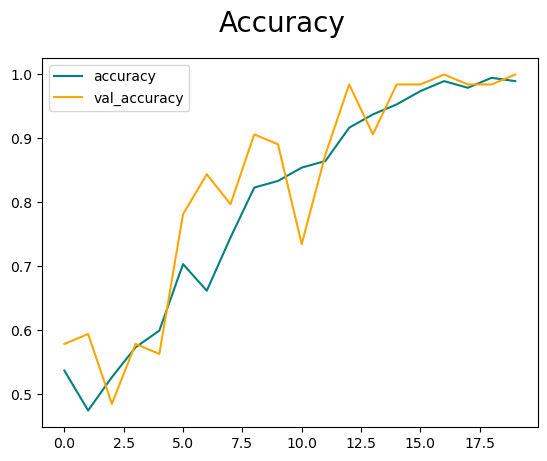

In [46]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [47]:
#evaluate
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [48]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [49]:
#len(test)

1

In [50]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 111ms/step


In [51]:
#print(f'precision:{pre.result().numpy}, Recall:{re.result().numpy}, Accuracy:{acc.result().numpy}')

precision:<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=0.9230769>>, Recall:<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=1.0>>, Accuracy:<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=0.9677419>>


In [52]:
print(f'precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

precision:0.9230769276618958, Recall:1.0, Accuracy:0.9677419066429138


In [53]:
#test


In [54]:
import cv2

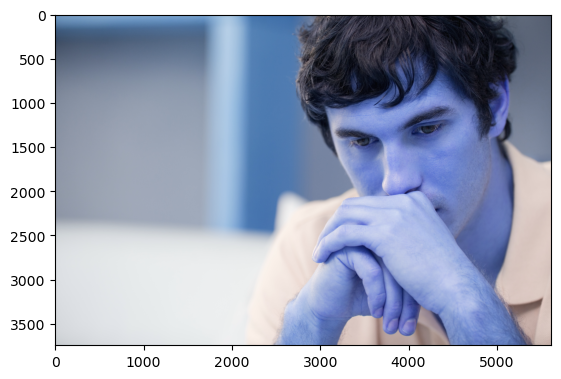

In [69]:
img = cv2.imread('8iAb9k4aT.jpg')
plt.imshow(img)
plt.show()

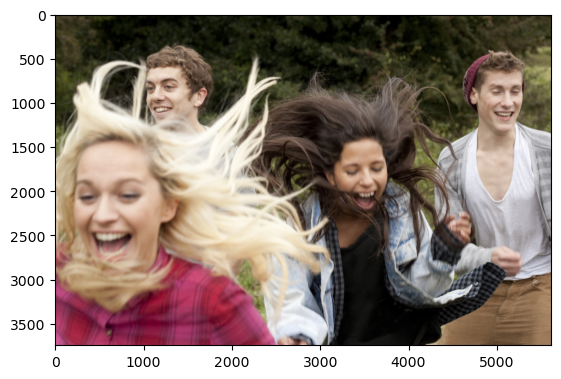

In [60]:
img = cv2.imread('154006829.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

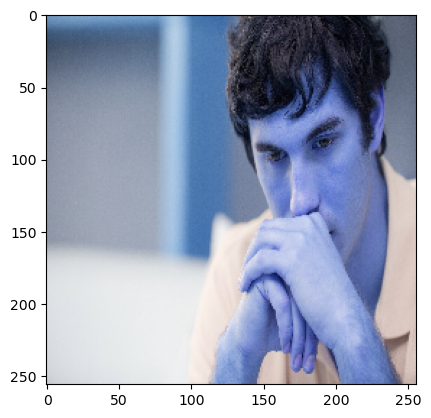

In [70]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [63]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[ 32.32617  ,  49.32617  ,  52.32617  ],
        [ 30.0625   ,  51.285156 ,  53.285156 ],
        [ 48.658203 ,  70.6582   ,  76.6582   ],
        ...,
        [ 20.164062 ,  38.033203 ,  44.753906 ],
        [ 12.8671875,  26.59375  ,  27.076172 ],
        [  1.5351562,  21.90039  ,  17.       ]],

       [[ 36.890625 ,  52.890625 ,  58.890625 ],
        [ 41.83203  ,  59.83203  ,  66.83203  ],
        [ 44.234375 ,  64.234375 ,  69.234375 ],
        ...,
        [ 20.558594 ,  38.558594 ,  45.558594 ],
        [ 26.798828 ,  39.39258  ,  42.20508  ],
        [ 21.9375   ,  37.277344 ,  34.34375  ]],

       [[ 34.501953 ,  56.501953 ,  61.970703 ],
        [ 43.57422  ,  65.75     ,  73.9375   ],
        [ 35.54492  ,  58.210938 ,  62.15039  ],
        ...,
        [ 26.642578 ,  47.98633  ,  55.29883  ],
        [ 28.90625  ,  46.79297  ,  55.34961  ],
        [ 22.626953 ,  40.814453 ,  41.876953 ]],

       ...,

     

In [62]:
np.expand_dims(resize,0)

array([[[[ 32.32617  ,  49.32617  ,  52.32617  ],
         [ 30.0625   ,  51.285156 ,  53.285156 ],
         [ 48.658203 ,  70.6582   ,  76.6582   ],
         ...,
         [ 20.164062 ,  38.033203 ,  44.753906 ],
         [ 12.8671875,  26.59375  ,  27.076172 ],
         [  1.5351562,  21.90039  ,  17.       ]],

        [[ 36.890625 ,  52.890625 ,  58.890625 ],
         [ 41.83203  ,  59.83203  ,  66.83203  ],
         [ 44.234375 ,  64.234375 ,  69.234375 ],
         ...,
         [ 20.558594 ,  38.558594 ,  45.558594 ],
         [ 26.798828 ,  39.39258  ,  42.20508  ],
         [ 21.9375   ,  37.277344 ,  34.34375  ]],

        [[ 34.501953 ,  56.501953 ,  61.970703 ],
         [ 43.57422  ,  65.75     ,  73.9375   ],
         [ 35.54492  ,  58.210938 ,  62.15039  ],
         ...,
         [ 26.642578 ,  47.98633  ,  55.29883  ],
         [ 28.90625  ,  46.79297  ,  55.34961  ],
         [ 22.626953 ,  40.814453 ,  41.876953 ]],

        ...,

        [[156.40234  ,  99.21875  , 20

In [64]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [71]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 16ms/step


In [72]:
#if it under 50 it is  happy
yhat

array([[0.99531984]], dtype=float32)

In [73]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [68]:
#Save The model 
from tensorflow.keras.models import load_model

In [74]:
model.save(os.path.join('models','happysadmodel.h5'))

In [77]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [12]:
new_model

NameError: name 'new_model' is not defined

In [80]:
yhat=new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 58ms/step


array([[0.99531984]], dtype=float32)

In [81]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [11]:
modell = tf.keras.models.load_model(new_model)

NameError: name 'new_model' is not defined

In [ ]:
with open("label.txt", "w") as f:
    f.write("cat\n")
    f.write("dog\n")
    f.write("bird\n")